In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import time

import warnings
warnings.filterwarnings("ignore")
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
#Loading data from volve data set
well_13 = pd.read_excel('VolveData_Project.xlsx', sheet_name='well 13',index_col=0)
well_14 = pd.read_excel('VolveData_Project.xlsx', sheet_name='well 14')
well_15 = pd.read_excel('VolveData_Project.xlsx', sheet_name='well 15')

In [3]:
well_13.head()

,Well,GR,RT,RHOB,NPHI
Depth,,,,,
4175.5,13,20.6032,4.1812,2.6117,0.0770
4176.0,13,21.4990,4.5516,2.6131,0.0798
4176.5,13,22.4472,4.4804,2.6334,0.0801
4177.0,13,29.6713,4.3859,2.6328,0.1005
4177.5,13,34.7014,4.8566,2.6183,0.1001


In [4]:
well_14.head()

,Depth,Well,GR,RT,RHOB,NPHI,Facies
0,3178.5,14,50.2190,0.5888,2.3296,0.3657,SH
1,3179.0,14,47.2468,0.7768,2.3170,0.3776,UN
2,3179.5,14,49.5247,1.0707,2.2960,0.5390,SH
3,3180.0,14,44.9124,1.4460,2.2514,0.5482,UN
4,3180.5,14,47.0048,0.9542,2.2733,0.5076,UN


In [5]:
data=pd.concat([well_14, well_15],axis=0)
data['RT_log']=np.log10(data['RT'])

In [6]:
data.head()

,Depth,Well,GR,RT,RHOB,NPHI,Facies,RT_log
0,3178.5,14,50.2190,0.5888,2.3296,0.3657,SH,-0.230032
1,3179.0,14,47.2468,0.7768,2.3170,0.3776,UN,-0.109691
2,3179.5,14,49.5247,1.0707,2.2960,0.5390,SH,0.029668
3,3180.0,14,44.9124,1.4460,2.2514,0.5482,UN,0.160168
4,3180.5,14,47.0048,0.9542,2.2733,0.5076,UN,-0.020361


GR - Gamma Radioactivity

RT - Total Resistivity

RHOB - Density

NPHI - Neutron Porosity

Facies - Rock types and position

RT_Log - Resistivity of Uninvaded zone

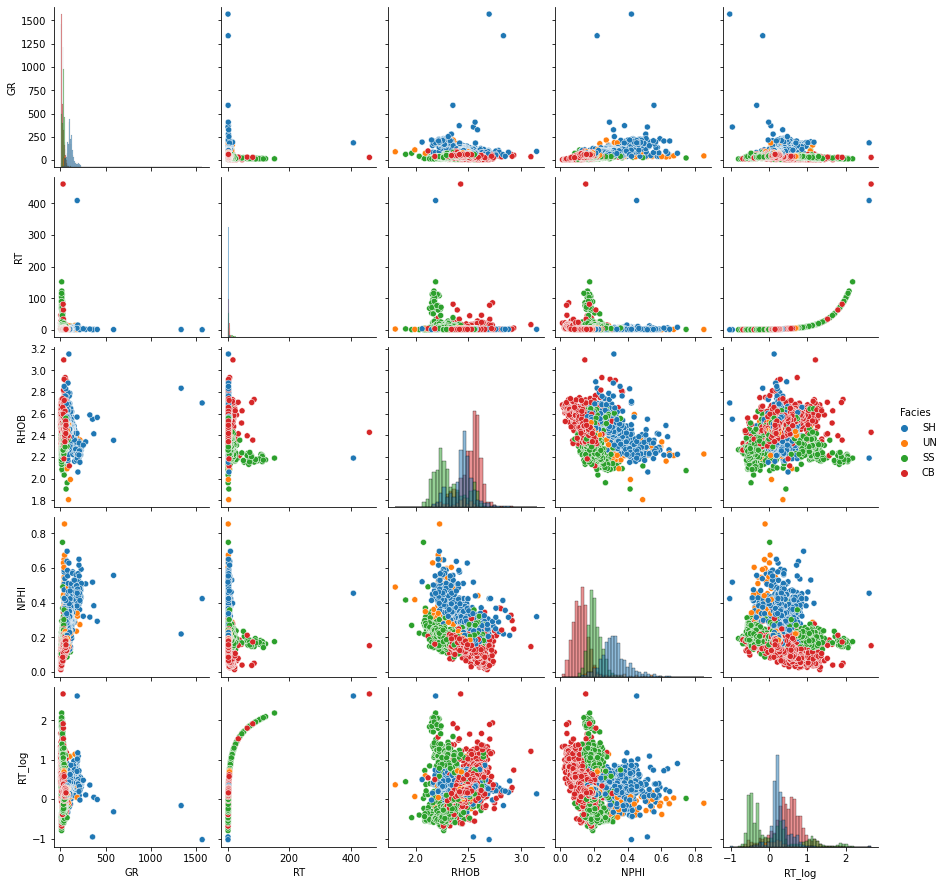

In [7]:
sns.pairplot(data.drop(['Well','Depth'], axis = 1) ,hue='Facies',diag_kind='hist')

In [8]:
labels=[1,2,3,4]
data['Facies_labels']=np.select([data['Facies'] == 'SH',
                                data['Facies'] == 'UN',
                                data['Facies'] == 'SS',
                                data['Facies'] == 'CB',]
                                ,labels)

In [9]:
data.head()

,Depth,Well,GR,RT,RHOB,NPHI,Facies,RT_log,Facies_labels
0,3178.5,14,50.2190,0.5888,2.3296,0.3657,SH,-0.230032,1
1,3179.0,14,47.2468,0.7768,2.3170,0.3776,UN,-0.109691,2
2,3179.5,14,49.5247,1.0707,2.2960,0.5390,SH,0.029668,1
3,3180.0,14,44.9124,1.4460,2.2514,0.5482,UN,0.160168,2
4,3180.5,14,47.0048,0.9542,2.2733,0.5076,UN,-0.020361,2


In [10]:
facies_colors=['#2E86C1', '#196F3D','#F4D03F','#DC7633']
facies = ['SH', 'UN', 'SS', 'CB']

def log_plot(logs,facies_colors):
    logs=logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies_labels'].values,1), 100, 1)
    
    f,ax=plt.subplots(nrows=1,ncols=5,figsize=(8,12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.RT_log, logs.Depth, '-')
    ax[2].plot(logs.NPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.RHOB, logs.Depth, '-', color='r')
    im=ax[4].imshow(cluster, interpolation='none', aspect='auto',
                   cmap=cmap_facies,vmin=1,vmax=4)
    
    divider = make_axes_locatable(ax[4])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((50*' ').join(['SH', 'UN', 'SS', 'CB']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
        
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("RT")
    ax[1].set_xlim(logs.RT_log.min(),logs.RT_log.max())
    ax[2].set_xlabel("NPHI")
    ax[2].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[3].set_xlabel("RHOB")
    ax[3].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[4].set_xlabel('Facies')
    
    ax[1].set_yticklabels([])
    ax[2].set_yticklabels([])
    ax[3].set_yticklabels([])
    ax[4].set_yticklabels([])
    ax[4].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well'], fontsize=14,y=0.94)

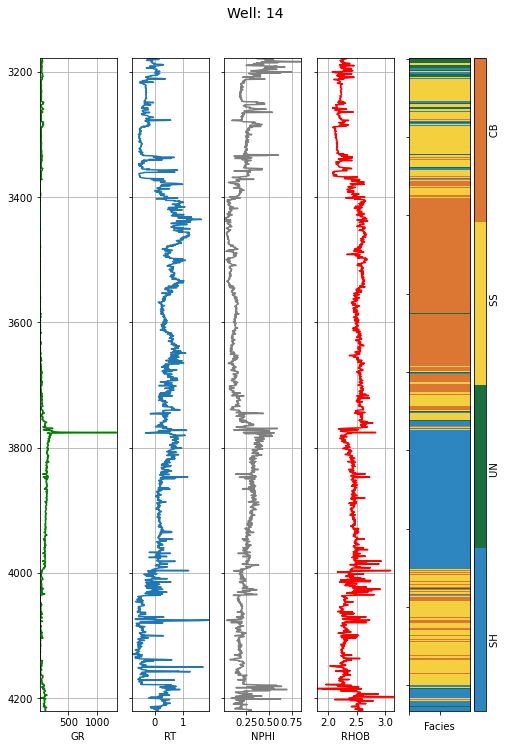

In [11]:
log_plot(data[data['Well'] == 14],facies_colors)

<AxesSubplot:title={'center':'Distribution of Facies'}>

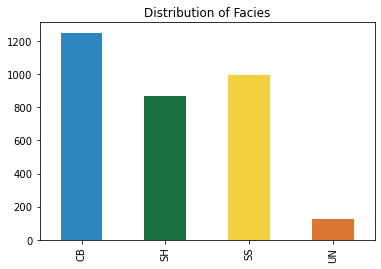

In [12]:
#Bar chart: Distribution of Facies
Facies_dist = data['Facies'].value_counts().sort_index()

Facies_dist.plot(kind='bar',color=facies_colors, 
                   title='Distribution of Facies')

In [13]:
data.set_index('Depth',inplace=True)


In [14]:
data.groupby("Well").count()

,GR,RT,RHOB,NPHI,Facies,RT_log,Facies_labels
Well,,,,,,,
14,2082,2082,2082,2082,2082,2082,2082
15,1159,1159,1159,1159,1159,1159,1159


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3241 entries, 3178.5 to 4085.5
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Well           3241 non-null   int64  
 1   GR             3241 non-null   float64
 2   RT             3241 non-null   float64
 3   RHOB           3241 non-null   float64
 4   NPHI           3241 non-null   float64
 5   Facies         3241 non-null   object 
 6   RT_log         3241 non-null   float64
 7   Facies_labels  3241 non-null   int32  
dtypes: float64(5), int32(1), int64(1), object(1)
memory usage: 215.2+ KB


In [16]:
data.head()

,Well,GR,RT,RHOB,NPHI,Facies,RT_log,Facies_labels
Depth,,,,,,,,
3178.5,14,50.2190,0.5888,2.3296,0.3657,SH,-0.230032,1
3179.0,14,47.2468,0.7768,2.3170,0.3776,UN,-0.109691,2
3179.5,14,49.5247,1.0707,2.2960,0.5390,SH,0.029668,1
3180.0,14,44.9124,1.4460,2.2514,0.5482,UN,0.160168,2
3180.5,14,47.0048,0.9542,2.2733,0.5076,UN,-0.020361,2


In [17]:
X = data.drop(['Facies','Well','Facies_labels','RT_log'], axis = 1) #Features: Feature vector
y = data['Facies']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import IsolationForest, RandomForestClassifier

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
print('Dimensions of X_train:',X_train.shape)
print('Dimensions of X_test:',X_test.shape)

Dimensions of X_train: (2268, 4)
Dimensions of X_test: (973, 4)


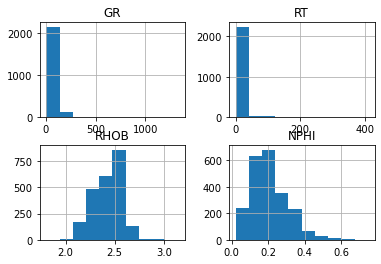

In [20]:
X_train.hist()
plt.show()

### Scaling 

In [21]:
#Types of scaling methods  - 
#1) Min Max Scaler
#2) Standard Scaler
#3) Max Abs Scaler
#4) Robust Scaler
#5) Quantile Transformer Scaler
#6) Power Transformer Scaler
#7) Unit Vector Scaler

In [22]:
# Robust Scaler
rscaler=RobustScaler()#instantiate
rscaler.fit(X_train)

RobustScaler()

In [23]:
X_train_scaled = rscaler.transform(X_train) # transform the train dataset to standardized data

# Original training dataset
print("Original median : %s " % rscaler.center_)
print("Original IQR : %s " % rscaler.scale_)

#Scaled training dataset
print("Scaled median : %s " % np.median(X_train_scaled,axis=0))
print("Scaled IQR : %s " % (np.percentile(X_train_scaled, 75,axis=0)-np.percentile(X_train_scaled, 25,axis=0)))

Original median : [34.37925  1.86645  2.4599   0.1877 ] 
Original IQR : [56.435125  2.56645   0.2349    0.13285 ] 
Scaled median : [0.00000000e+00 4.32596667e-17 0.00000000e+00 0.00000000e+00] 
Scaled IQR : [1. 1. 1. 1.] 


In [24]:
#Scale the test data using the parameters learnt from the training dataset
X_test_scaled  = rscaler.transform(X_test)

print("Median of scaled test data: %s" % np.median(X_test_scaled,axis=0))
print("IQR of scaled test data: %s " % (np.percentile(X_test_scaled, 75,axis=0)-np.percentile(X_test_scaled, 25,axis=0)))

Median of scaled test data: [-0.02022233 -0.00718892 -0.02085994  0.00828002]
IQR of scaled test data: [0.84470443 1.15225311 1.04725415 1.02672187] 


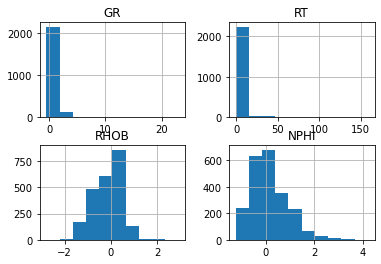

In [25]:
pd.DataFrame(X_train_scaled,index=X_train.index, columns=X_test.columns).hist()
plt.show()

In [26]:
X_train=pd.DataFrame(X_train_scaled,index=X_train.index, columns=X_test.columns)
X_test=pd.DataFrame(X_test_scaled,index=X_test.index, columns=X_test.columns)
X_test

,GR,RT,RHOB,NPHI
Depth,,,,
3475.0,-0.410851,1.819576,0.566624,-0.899511
3350.5,-0.086355,-0.609188,-1.153682,0.333459
3550.5,-0.455995,0.973816,0.485313,-0.736169
3372.0,-0.283177,-0.408521,0.408685,-0.119684
4033.5,0.220745,-0.030957,0.124308,-0.383139
...,...,...,...,...
4186.5,0.696466,2.376454,-1.005534,3.826872
3271.0,-0.090600,-0.493892,-1.080034,0.070004
4000.0,0.033912,-0.422432,-0.455087,-0.048927


### Outlier Detection - Isolation Forest 

##### In principle, outliers are less frequent than regular observations and are different from them in terms of values (they lie further away from the regular observations in the feature space).

In [27]:
# Isolation Forest
iforest = IsolationForest(n_estimators=200, contamination=0.5/100)
iforest = iforest.fit(X_train) #Training the model

In [28]:
#Predictions
X_train_predict = iforest.predict(X_train) 
X_train['Predict']=X_train_predict
X_train['Predict'] = X_train['Predict'].astype('category')
X_train

,GR,RT,RHOB,NPHI,Predict
Depth,,,,,
3591.5,-0.147820,0.594031,0.481907,-0.584870,1
3894.0,1.365941,-0.219467,-0.003831,1.011667,1
3963.5,0.331349,-0.432679,-0.352916,-0.118931,1
3747.0,0.077915,0.080091,0.621541,-0.130222,1
3932.0,1.185739,0.080715,0.081311,0.647347,1
...,...,...,...,...,...
4144.5,0.097780,-0.607240,-0.962112,0.336470,1
3219.0,-0.074387,-0.575717,-0.868029,0.051186,1
4109.0,-0.370371,-0.613474,-0.570456,-0.070756,1


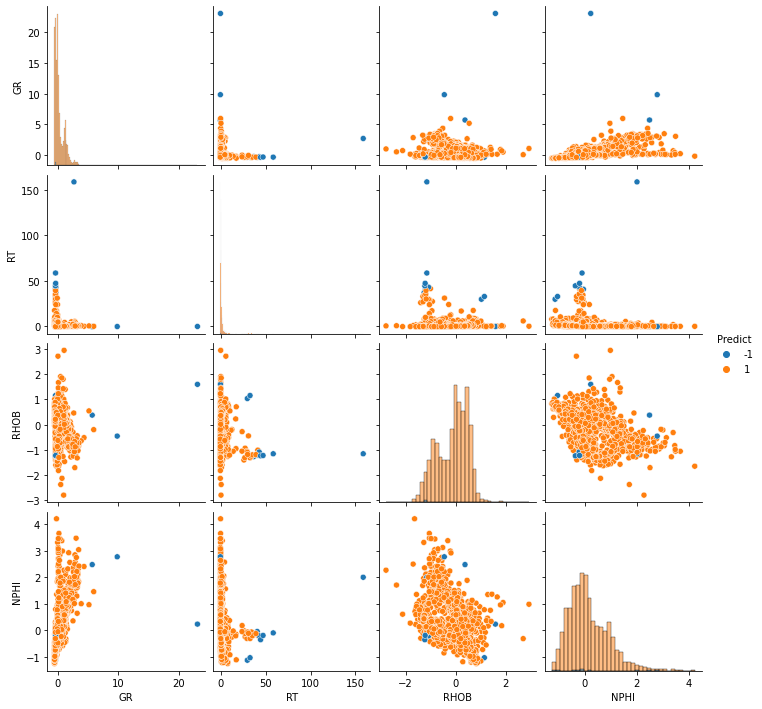

In [29]:
#Visualization
sns.pairplot(X_train,hue='Predict',diag_kind='hist')

In [30]:
#Removing Outliers
X_train['y_train']=y_train
X_train = X_train[X_train['Predict'] == 1]

y_train=X_train['y_train']
X_train = X_train.drop(['Predict','y_train'], axis = 1)

In [31]:
print(len(X_train))
print(len(y_train))

2256
2256


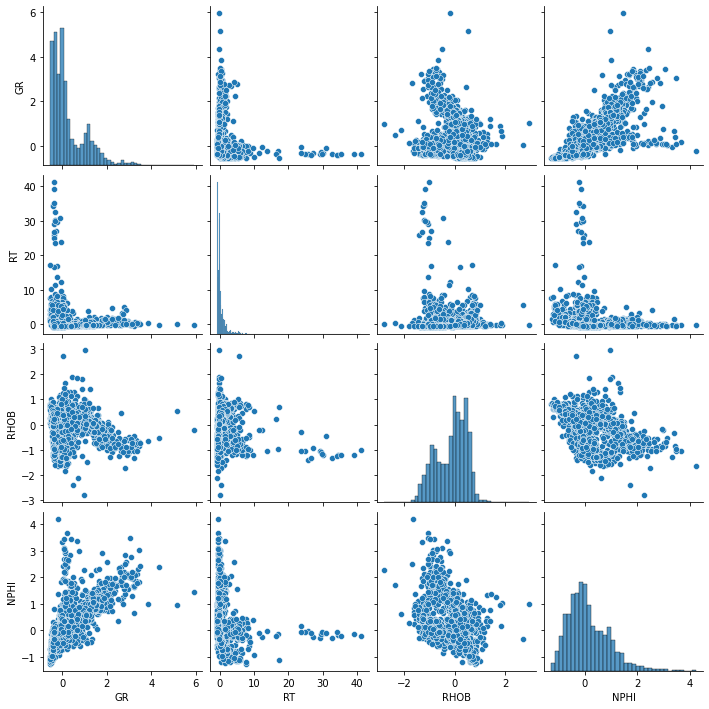

In [32]:
#Visualization Without Outliers
sns.pairplot(X_train,diag_kind='hist')

Logistic Regression
----

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [35]:
print(logmodel.coef_)

[[-3.16669724  0.20502021  0.4788206  -4.03897851]
 [ 4.12348566 -0.50102557  1.40897924  2.53741992]
 [-2.32809457  0.22301376 -1.45619425 -0.07583573]
 [ 1.37130615  0.07299161 -0.43160558  1.57739432]]


In [36]:
print(logmodel.intercept_)

[ 1.46372835 -2.1454324   1.78307968 -1.10137562]


In [37]:
predictions=logmodel.predict(X_test)

In [39]:
#Compare against true labels (Accuracy)
print('Accuracy (generalization)',logmodel.score(X_test,y_test)) #Accuracy (generalization)  
print('Accuracy (memorization)',logmodel.score(X_train,y_train)) #Accuracy (memorization)

Accuracy (generalization) 0.8335046248715313
Accuracy (memorization) 0.849290780141844


In [42]:
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, confusion_matrix

In [43]:
#Comparing other metrics (f1_score)
print('F1_score (generalization)',f1_score(y_test,logmodel.predict(X_test),average="weighted")) #Accuracy (generalization)  
print('F1_score (memorization)',f1_score(y_train,logmodel.predict(X_train),average="weighted")) #Accuracy (memorization)    

F1_score (generalization) 0.8181761823836434
F1_score (memorization) 0.834924826454037


In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          CB       0.85      0.84      0.84       383
          SH       0.92      0.96      0.94       250
          SS       0.75      0.83      0.79       303
          UN       0.00      0.00      0.00        37

    accuracy                           0.83       973
   macro avg       0.63      0.66      0.64       973
weighted avg       0.80      0.83      0.82       973



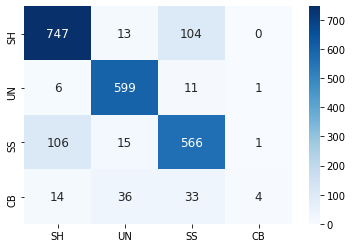

In [48]:
#Confusion Matrix
names = ['SH', 'UN', 'SS', 'CB']

cf_matrix = confusion_matrix(y_train, logmodel.predict(X_train))
cf_matrix
cf=sns.heatmap(cf_matrix, annot=True, annot_kws={"size": 12},cmap='Blues',fmt="d",xticklabels=names,yticklabels=names)

plt.show()

Random Forrest  
---

In [49]:
cforest=RandomForestClassifier(criterion='entropy',n_estimators=100,max_depth=5,random_state=1, n_jobs=2) #Creating Instance
cforest.fit(X_train, y_train) #Learning the decision boundaries
y_pred = cforest.predict(X_test)

In [51]:
#Compare against true labels (Accuracy)
print('Accuracy (generalization)',cforest.score(X_test,y_test)) #Accuracy (generalization)  
print('Accuracy (memorization)',cforest.score(X_train,y_train)) #Accuracy (memorization)

Accuracy (generalization) 0.8766700924974307
Accuracy (memorization) 0.8918439716312057


In [54]:
#Comparing other metrics (f1_score)
print('F1_score (generalization)',f1_score(y_test,cforest.predict(X_test),average="weighted")) #F1_score (generalization)  
print('F1_score (memorization)',f1_score(y_train,cforest.predict(X_train),average="weighted")) #F1_score (memorization)  

F1_score (generalization) 0.8717620555393607
F1_score (memorization) 0.8877497653262555


In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          CB       0.92      0.84      0.88       383
          SH       0.95      0.97      0.96       250
          SS       0.78      0.91      0.84       303
          UN       1.00      0.30      0.46        37

    accuracy                           0.88       973
   macro avg       0.91      0.76      0.78       973
weighted avg       0.89      0.88      0.87       973



Suppport Vector Machine
----

In [58]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import LinearSVC, SVC
  
#Defining parameter range 
Tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                     'C': [0.1, 1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['poly'],'C': [1, 10, 100, 1000],'degree': [2,3,4]}]
  
svc_mod = GridSearchCV(SVC(), Tuned_parameters, refit = True, verbose = 3) 

In [59]:
svc_mod.fit(X_train, y_train) 
svc_mod.best_estimator_

Fitting 5 folds for each of 41 candidates, totalling 205 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.865, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.840, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.823, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.840, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.840, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.858, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.818, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.803, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.827, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.843, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.821, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.823, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.829, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.829, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.849, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.830, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.825, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.829, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] .

[CV] .................. C=1, kernel=linear, score=0.881, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.831, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.834, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.849, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.845, total=   0.0s
[CV] C=10, kernel=linear .............................................
[CV] ................. C=10, kernel=linear, score=0.883, total=   0.1s
[CV] C=10, kernel=linear .............................................
[CV] ................. C=10, kernel=linear, score=0.831, total=   0.1s
[CV] C=10, kernel=linear .............................................
[CV] .

[CV] ........ C=100, degree=3, kernel=poly, score=0.843, total=   0.2s
[CV] C=100, degree=4, kernel=poly ....................................
[CV] ........ C=100, degree=4, kernel=poly, score=0.686, total=  11.3s
[CV] C=100, degree=4, kernel=poly ....................................
[CV] ........ C=100, degree=4, kernel=poly, score=0.712, total=   6.4s
[CV] C=100, degree=4, kernel=poly ....................................
[CV] ........ C=100, degree=4, kernel=poly, score=0.707, total=  13.9s
[CV] C=100, degree=4, kernel=poly ....................................
[CV] ........ C=100, degree=4, kernel=poly, score=0.747, total=   0.1s
[CV] C=100, degree=4, kernel=poly ....................................
[CV] ........ C=100, degree=4, kernel=poly, score=0.743, total=   8.8s
[CV] C=1000, degree=2, kernel=poly ...................................
[CV] ....... C=1000, degree=2, kernel=poly, score=0.814, total=   5.1s
[CV] C=1000, degree=2, kernel=poly ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 205 out of 205 | elapsed:  8.2min finished


SVC(C=100, gamma=0.1)

In [60]:
print(svc_mod.best_params_) 

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [61]:
#Performance (Accuracy)
print('Accuracy (generalization)',svc_mod.score(X_test,y_test)) #Accuracy (generalization)  
print('Accuracy (memorization)',svc_mod.score(X_train,y_train)) #Accuracy (memorization)

#Comparing other metrics (f1_score)
print('F1_score (generalization)',f1_score(y_test,svc_mod.predict(X_test),average="weighted")) #F1_score (generalization)  
print('F1_score (memorization)',f1_score(y_train,svc_mod.predict(X_train),average="weighted")) #F1_score (memorization) 

Accuracy (generalization) 0.868448098663926
Accuracy (memorization) 0.8891843971631206
F1_score (generalization) 0.8660067110496338
F1_score (memorization) 0.8876080421328483


In [62]:
srbf=SVC(C=100,kernel='rbf',gamma=0.1)
srbf.fit(X_train, y_train)

SVC(C=100, gamma=0.1)

In [63]:
#Performance (Accuracy)
print('Accuracy (generalization)',srbf.score(X_test,y_test)) #Accuracy (generalization)  
print('Accuracy (memorization)',srbf.score(X_train,y_train)) #Accuracy (memorization)

#Comparing other metrics (f1_score)
print('F1_score (generalization)',f1_score(y_test,srbf.predict(X_test),average="weighted")) #F1_score (generalization)  
print('F1_score (memorization)',f1_score(y_train,srbf.predict(X_train),average="weighted")) #F1_score (memorization) 

Accuracy (generalization) 0.868448098663926
Accuracy (memorization) 0.8891843971631206
F1_score (generalization) 0.8660067110496338
F1_score (memorization) 0.8876080421328483


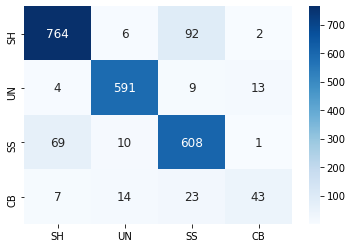

In [64]:
#Confusion Matrix
cf_matrix = confusion_matrix(y_train, srbf.predict(X_train))

sns.heatmap(cf_matrix, annot=True, annot_kws={"size": 12},cmap='Blues',fmt="d",xticklabels=names,yticklabels=names)

plt.show()